In [1]:
!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from prophet import Prophet
import warnings
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")
sns.set()

Importing plotly failed. Interactive plots will not work.


### Datos

In [4]:
train = pd.read_csv('2005_2006_flights.csv')
test = pd.read_csv('2007_flights.csv')

In [5]:
train.head(2)

,year_month,count
0,2005-01-01,594924
1,2005-02-01,545332


### Auto Arima

In [6]:
train_autoarima = train.copy()
test_autoarima = test.copy()

In [7]:
train_autoarima.year_month = pd.to_datetime(train_autoarima.year_month)
train_autoarima.set_index("year_month", inplace=True)
train_autoarima.head(2)

,count
year_month,
2005-01-01,594924
2005-02-01,545332


In [8]:
test_autoarima.year_month = pd.to_datetime(test_autoarima.year_month)
test_autoarima.set_index("year_month", inplace=True)
test_autoarima.head(2)

,count
year_month,
2007-01-01,621559
2007-02-01,565604


In [9]:
train_autoarima.index.freq = 'MS'
train_autoarima.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
               '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01'],
              dtype='datetime64[ns]', name='year_month', freq='MS')

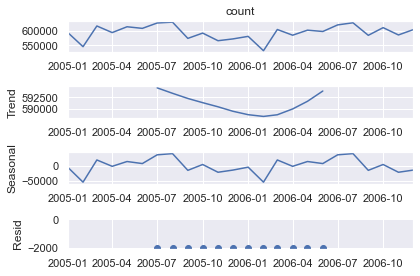

In [10]:
sd = seasonal_decompose(train_autoarima['count'], model='add')
sd.plot();

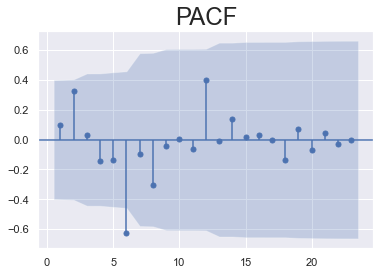

In [11]:
plot_acf(train_autoarima['count'], lags = 23, zero = False)
plt.title("PACF", size = 24)
plt.show()

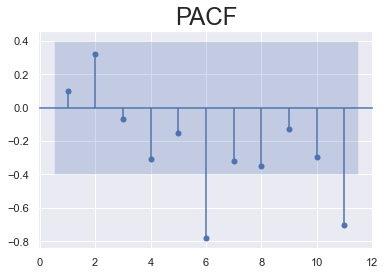

In [12]:
plot_pacf(train_autoarima['count'], lags = 11, zero = False, method = ('ols'))
plt.title("PACF", size = 24)
plt.show()

In [13]:
model_auto = auto_arima(train_autoarima)

In [14]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -272.794
Date:                Tue, 05 Apr 2022   AIC                            557.587
Time:                        14:16:27   BIC                            564.656
Sample:                             0   HQIC                           559.462
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.875e+05    1.6e-06   2.41e+11      0.000    3.88e+05    3.88e+05
ar.L1          0.6899      0.426      1.620      0.105      -0.145       1.525
ar.L2         -0.3416      0.425     -0.804      0.422      -1.175       0.492
ma.L1         -0.8007      0.430     -1.863      0.062      -1.643       0.042
ma.L2          0.9368      0.604      1.550      0.121      -0.248       2.121
sigma2       4.65e+08   1.84e-09   2.52e+17      0.000    4.65e+08    4.65e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.98   Prob(JB):                         0.20
Heteroskedasticity (H):               0.43   Skew:                            -0.90
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+33. Standard errors may be unstable.
"""

### Predicciones

In [15]:
len(test_autoarima)

12

In [16]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(test_autoarima)), index = test_autoarima.index)

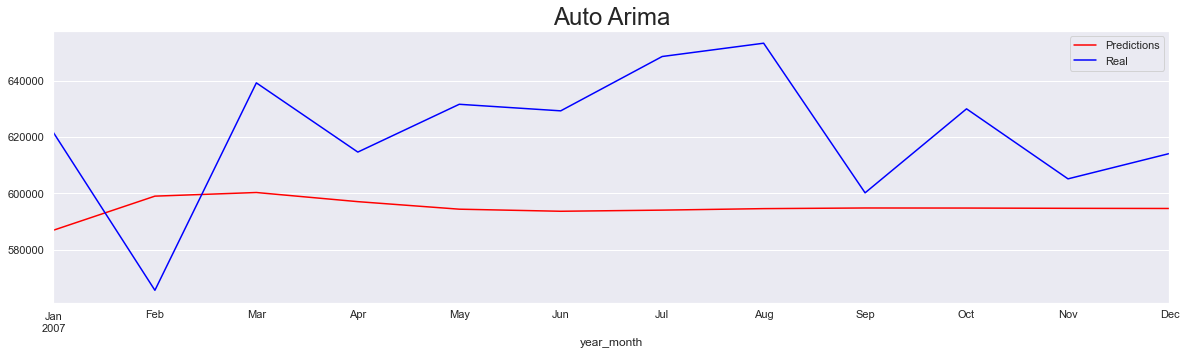

In [17]:
pred.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Configurando Auto Arima

In [57]:
model_auto = auto_arima(train_autoarima, start_p=1,start_q=1, max_order=None, start_P=1,start_Q=1,m=12, d=1,D=1)

#model_auto = auto_arima(train_autoarima, start_p=1,start_q=1, max_p=12,max_q=12, , max_order=None, start_P=1,start_Q=1,m=12, d=1,D=1)

#max_order=None
#model_auto = auto_arima(train_autoarima, m=12, d=1, D=2)

model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -106.055
Date:                             Tue, 05 Apr 2022   AIC                            220.109
Time:                                     15:16:04   BIC                            221.701
Sample:                                          0   HQIC                           219.106
                                              - 24                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1246.9012   1977.921      0.630      0.528   -2629.753    5123.556
ar.L1          0.9224      0.393      2.347      0.019       0.152       1.693
ma.L1         -0.8893      0.299     -2.976      0.003      -1.475      -0.304
sigma2      1.498e+07      0.401   3.74e+07      0.000     1.5e+07     1.5e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.55   Prob(JB):                         0.93
Heteroskedasticity (H):               3.11   Skew:                            -0.20
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.47e+22. Standard errors may be unstable.
"""

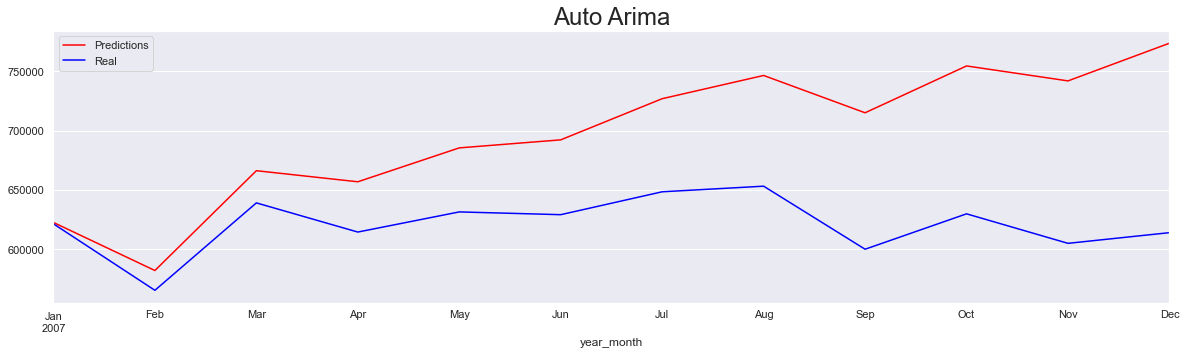

In [54]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(test_autoarima)), index = test_autoarima.index)
pred.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

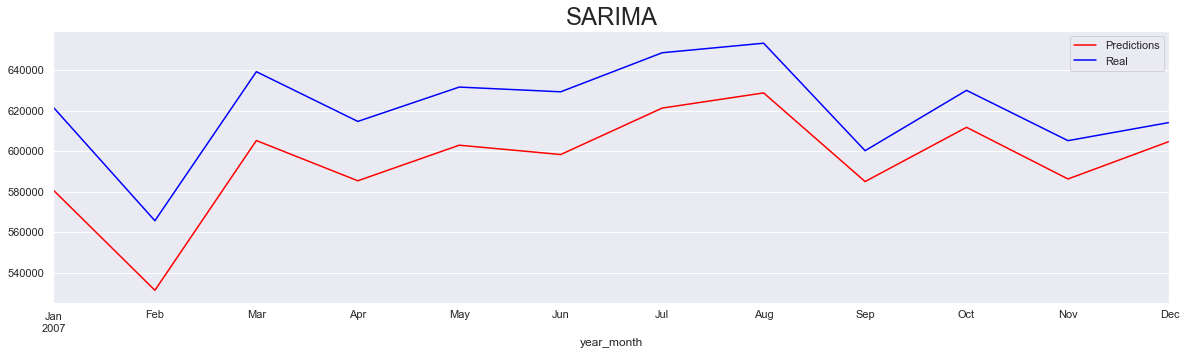

In [20]:
model_sarima = SARIMAX(train_autoarima, order = (1,0,0), seasonal_order = (1,1,1,12))
results_sarima = model_sarima.fit()
start_date='2007-01-01'
end_date='2007-12-01'
pred_sarima = results_sarima.predict(start = start_date, end = end_date)

pred_sarima.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("SARIMA", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Prophet

In [21]:
train.columns = ['ds','y']
train['ds'] = pd.to_datetime(train['ds'])
train.head(2)

,ds,y
0,2005-01-01,594924
1,2005-02-01,545332


In [22]:
test.year_month = pd.to_datetime(test.year_month)
test.set_index("year_month", inplace=True)
test.head(2)

,count
year_month,
2007-01-01,621559
2007-02-01,565604


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.


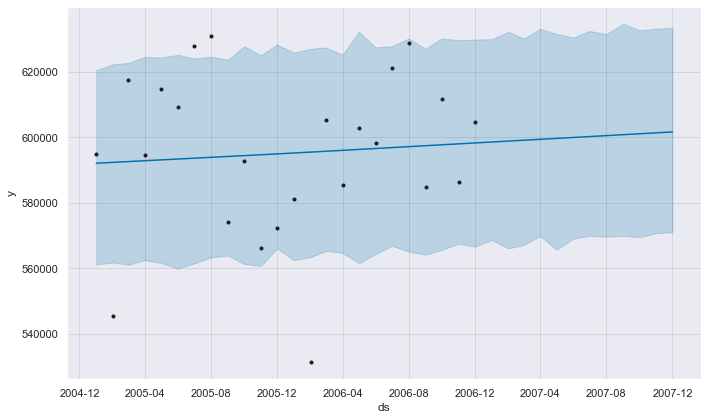

In [23]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(12, freq='MS') # MS: primer día del mes https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
forecast = m.predict(future)
fig = m.plot(forecast)

In [24]:
# Save predictions
pred_prophet = pd.DataFrame(forecast.yhat[-12:].values, index = forecast[-12:].ds.values)
pred_prophet.head(2)

,0
2007-01-01,598541.810255
2007-02-01,598827.895834


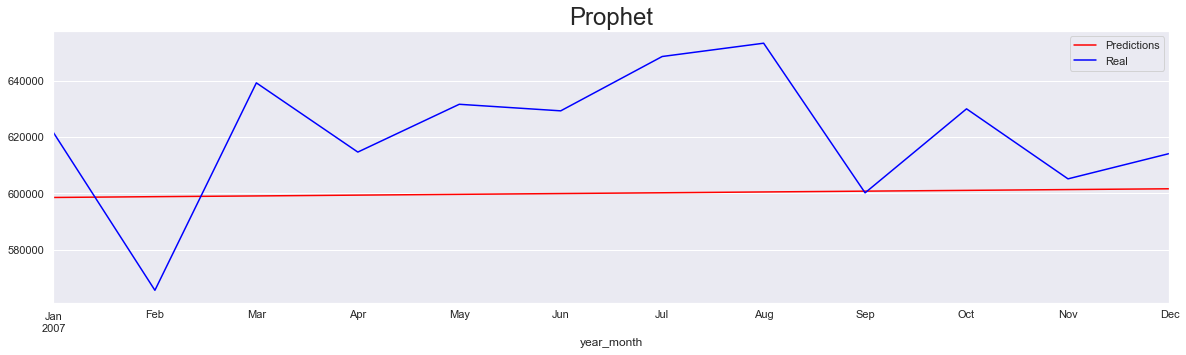

In [25]:
pred_prophet.plot(figsize = (20,5), color = "red")
test['count'].plot(color = "blue")
plt.title("Prophet", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Configuración de Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.


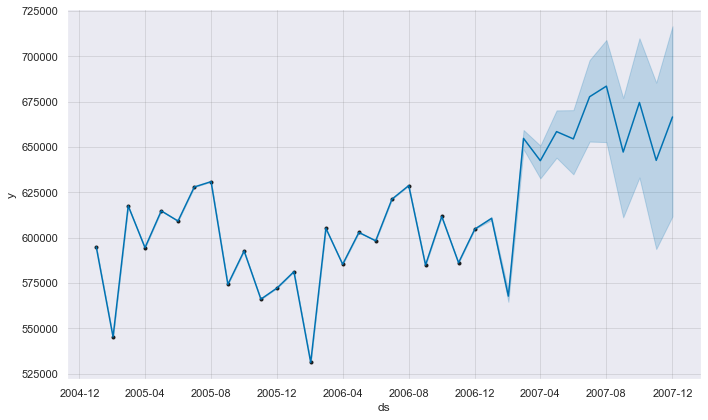

In [26]:
m = Prophet(yearly_seasonality=True)
m.fit(train)
future = m.make_future_dataframe(12, freq='MS') # MS: primer día del mes https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
forecast = m.predict(future)
fig = m.plot(forecast)

In [27]:
# Save predictions
pred_prophet = pd.DataFrame(forecast.yhat[-12:].values, index = forecast[-12:].ds.values)
pred_prophet.head(2)

,0
2007-01-01,610688.060957
2007-02-01,567819.833758


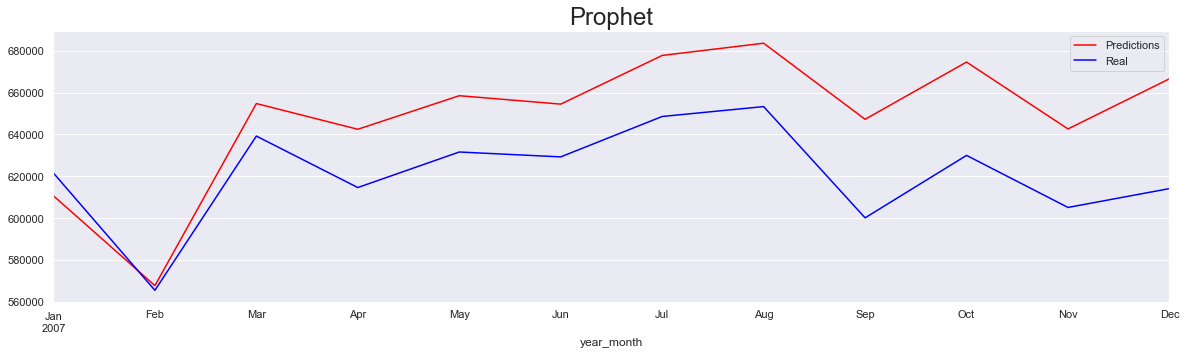

In [28]:
pred_prophet.plot(figsize = (20,5), color = "red")
test['count'].plot(color = "blue")
plt.title("Prophet", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Comparando Auto Arima, SARIMA y Prophet


In [29]:
predictions=pd.DataFrame(pred.values,columns=['autoarima'],  index = test_autoarima.index)

In [30]:
predictions['sarima']=pred_sarima.values
predictions['prophet']=pred_prophet.values
predictions['test']=test['count']
predictions.head(2)

,autoarima,sarima,prophet,test
year_month,,,,
2007-01-01,567191.296401,580666.750377,610688.060957,621559
2007-02-01,517599.296401,531241.700076,567819.833758,565604


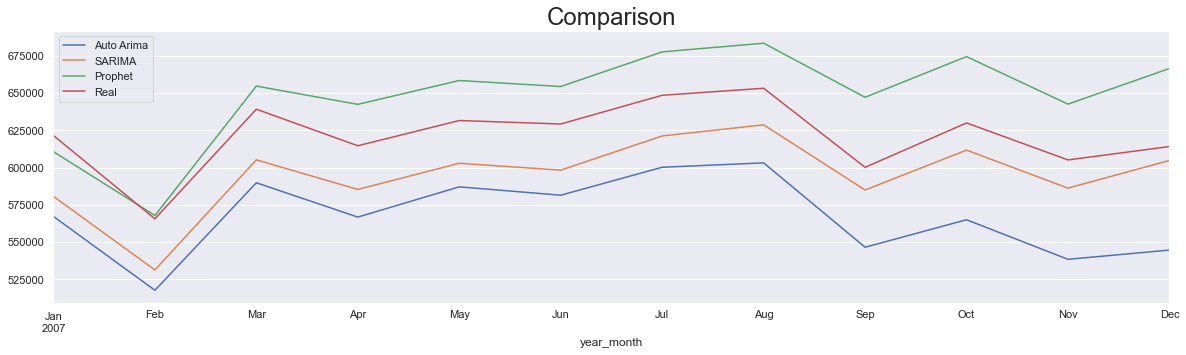

In [31]:
predictions.plot(figsize = (20,5))
plt.title("Comparison", size = 24)
plt.legend(['Auto Arima','SARIMA','Prophet','Real'])
plt.show()

### Comparación numérica

In [32]:
from sklearn.metrics import mean_squared_error 
rmse_autoarima = np.sqrt(mean_squared_error(predictions.test, predictions['autoarima']))
rmse_sarima = np.sqrt(mean_squared_error(predictions.test, predictions['sarima']))
rmse_prophet = np.sqrt(mean_squared_error(predictions.test, predictions['prophet']))
print('RMSE Autoarima:',rmse_autoarima)
print('RMSE SARIMA:',rmse_sarima)
print('RMSE Prophet:',rmse_prophet)

RMSE Autoarima: 54395.877462644195
RMSE SARIMA: 27404.656239116543
RMSE Prophet: 32408.230267061343
